<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from empath import Empath
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from scipy.stats.stats import pearsonr
from function_library import *
from function_library2 import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA


DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [10]:
# load CRA meeting minutes data
df_minutes = pd.read_csv('/Users/joey/Downloads/CRA_Meeting_Minutes_Coded_2020421.csv')
date = pd.to_datetime(df_minutes['DATE'])
df_minutes['date'] = date


In [11]:
unique_date = pd.Series(df_minutes['date'].unique())
money_sums = df_minutes.groupby(['date'])['MONEY'].sum()

# number of money related decisions
m_decision_sums = df_minutes.groupby(['date'])['MONEY'].count() 
# number of all decisions
all_decision_sums = df_minutes.groupby(['date'])['PARTICIPANTS'].count() 


In [12]:
# find money amount and decision amount
money_amounts = np.zeros((6,12))
decision_amounts = np.zeros((6,12))
for i in range(len(money_sums)):
    unique_date.dt.year[i]
    i_x = unique_date.dt.year[i]-2012
    i_y = unique_date.dt.month[i]-1
    money_amounts[i_x,i_y] = money_sums[i]
    decision_amounts[i_x,i_y] = m_decision_sums[i]

In [3]:
# load in data
df = pd.read_csv('output6_triplets_names.csv',index_col = 0)
bodies = df['Body'].values

In [5]:
re_body = re.compile(r"[\'\"](.*?)[\'\"]")

bodies_in_a_line = []
for body in bodies:
    body_in_a_line = ''
    lines = re_body.findall(body)
    for line in lines:
        body_in_a_line = body_in_a_line+' '+line
    bodies_in_a_line.append(body_in_a_line)

In [6]:
# load empath tagger
lexicon = Empath()

In [7]:
# print out all the category names and the total number of category
keys = list(lexicon.analyze('a', normalize=False).keys()) # categories=["violence"]
print(keys)
print(len(keys))

['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic', 'celebr

In [8]:
# apply empath to our emails
empath_counts = np.zeros((df.shape[0], len(keys)))
for idx,body in enumerate(tqdm_notebook(bodies_in_a_line)):
    result = lexicon.analyze(body.lower(), normalize=False)
    for jdx,key in enumerate(keys):
        empath_counts[idx,jdx] = result[key]

/Users/joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# apply empath to our emails
empath_counts_normed = np.zeros((df.shape[0], len(keys)))
for idx,body in enumerate(tqdm_notebook(bodies_in_a_line)):
    result = lexicon.analyze(body.lower(), normalize=True)
    try:
        for jdx,key in enumerate(keys):
            empath_counts_normed[idx,jdx] = result[key]
    except:
        continue

/Users/joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df['Sent'] = pd.to_datetime(df['Sent'])

year_list = df['Sent'].dt.year
month_list = df['Sent'].dt.month
# empath_normed=np.loadtxt('empath_normed.txt')

email_by_month=np.zeros((6,12))
for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = month_list[i]-1
    email_by_month[year_idx, month_idx] += empath_counts_normed[i, 3]

In [14]:

money_amounts = money_amounts.reshape(-1)
# money_amounts = money_amounts/money_amounts.max()
decision_amounts = decision_amounts.reshape(-1)
# dicision_amounts = dicision_amounts/dicision_amounts.max()
email_by_month = email_by_month.reshape(-1)
# email_by_month = email_by_month/email_by_month.max()


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/joey/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


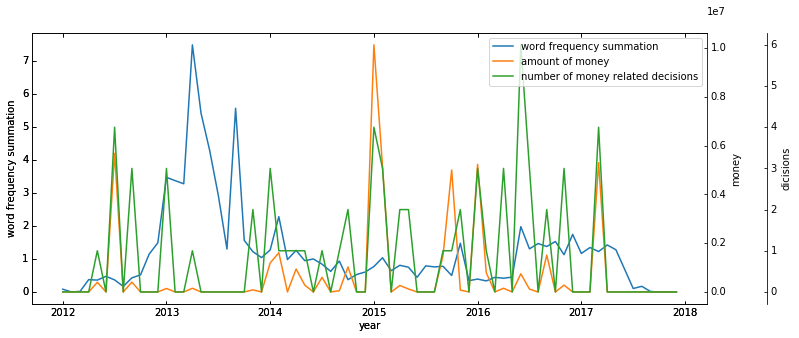

In [19]:
# plotting
plt.figure(figsize=(15,5))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(offset, 0))
par1.axis["right"].toggle(all=True)

host.set_xlabel("year")
host.set_ylabel("word frequency summation")
par1.set_ylabel("money")
par2.set_ylabel("dicisions")

p1, = host.plot(email_by_month, label = 'word frequency summation')
p2, = par1.plot(money_amounts, label = 'amount of money')
p3, = par2.plot(decision_amounts, label = 'number of money related decisions')

host.set_xticks(np.linspace(0,12*6,7))
host.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
host.legend()
plt.draw()
plt.show()

In [ ]:
# cra related emails

In [20]:
df_cra=pd.read_excel('emails-combine 06162020.xlsx',sheet_name=1,usecols=[1,2])
df_cra = df_cra.iloc[2:16]
df_cra.columns = ['first','last']
df_cra = df_cra.applymap(str.lower)
df_cra = df_cra.reset_index(drop=True)
first = df_cra['first'].values.tolist()
last = df_cra['last'].values.tolist()

In [25]:
# find all CRA member related emails
from_list = df['From'].values.tolist()
to_list = df['To'].values.tolist()
cc_list = df['CC'].values.tolist()

keep_idx=[]
for i in range(len(from_list)):
    for j in range(len(first)):
        if (first[j] in from_list[i] and last[j] in from_list[i]):
            keep_idx.append(i)
            break
        for t in to_list[i]:
            if (first[j] in t and last[j] in t):
                keep_idx.append(i)
                break
        for cc in cc_list[i]:
            if (first[j] in cc and last[j] in cc):
                keep_idx.append(i)
                break
# print('number of related emails was 1357, now',len(keep_idx))

In [33]:
year_list2 = year_list.values[keep_idx]
month_list2 = month_list.values[keep_idx]
empath_normed2 = empath_counts_normed[keep_idx,:]
email_by_month2=np.zeros((6,12))
# email_number_by_month2=np.zeros((6,12))

for i in range(len(month_list2)):
    year_idx = year_list2[i]-2012
    month_idx = month_list2[i]-1
    email_by_month2[year_idx, month_idx] += empath_normed2[i, 3]
#     email_number_by_month2[year_idx, month_idx] += 1
# reshape
email_by_month2 = email_by_month2.reshape(-1)

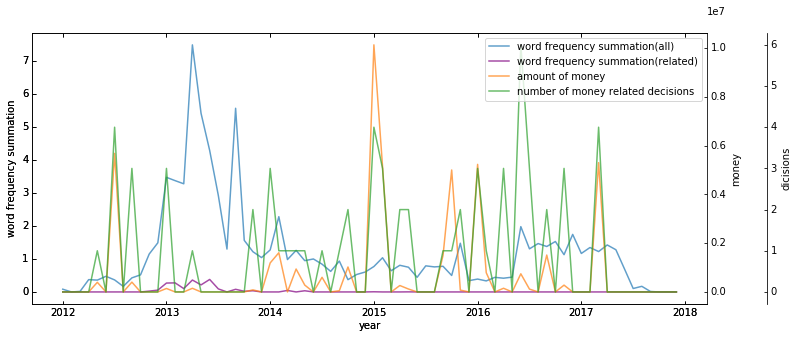

In [34]:
# plotting with #decision and #money
plt.figure(figsize=(15,5))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(offset, 0))
par1.axis["right"].toggle(all=True)

host.set_xlabel("year")
host.set_ylabel("word frequency summation")
par1.set_ylabel("money")
par2.set_ylabel("dicisions")

alpha = 0.7
p1, = host.plot(email_by_month, alpha = alpha, label = 'word frequency summation(all)')
p2, = par1.plot(money_amounts, alpha = alpha, label = 'amount of money')
p3, = par2.plot(decision_amounts, alpha = alpha, label = 'number of money related decisions')
p1, = host.plot(email_by_month2, alpha = alpha, color = 'purple', label = 'word frequency summation(related)')


host.set_xticks(np.linspace(0,12*6,7))
host.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
host.legend()
plt.draw()
plt.show()

In [35]:
# correlation between all emails and money amount 

np.corrcoef(email_by_month, money_amounts)

array([[ 1.       , -0.1019662],
       [-0.1019662,  1.       ]])

In [36]:
# correlation between related emails and money amount 

np.corrcoef(email_by_month2, money_amounts)

array([[ 1.        , -0.12075162],
       [-0.12075162,  1.        ]])

In [37]:
# correlation between all emails and decision amount 

np.corrcoef(email_by_month, decision_amounts)

array([[ 1.        , -0.00179173],
       [-0.00179173,  1.        ]])

In [38]:
# correlation between related emails and decision amount 

np.corrcoef(email_by_month2, decision_amounts)

array([[ 1.        , -0.05938554],
       [-0.05938554,  1.        ]])

In [39]:
np.corrcoef(money_amounts, decision_amounts)

array([[1.        , 0.58560422],
       [0.58560422, 1.        ]])